<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

# **Creat DataSet**

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ایجاد یک سری سینوسی برای 1500 گام زمانی با نویز تصادفی.</div>

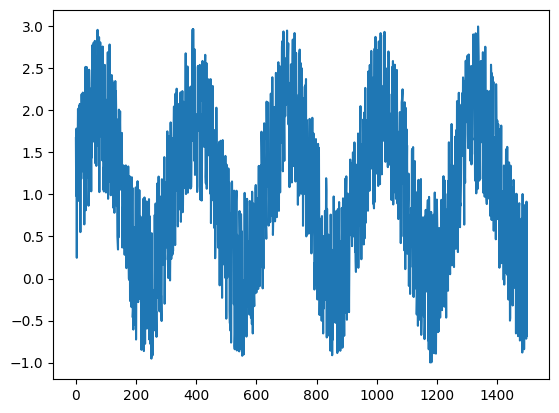

In [ ]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
plt.plot(x)
plt.show()

# **Split Train & Test Data**

<div style="direction:rtl;text-align:right;font-family:Tahoma">
 مقدار اول برای آموزش 1000 تا و 500 تای آخر برای تست در نظر گرفته شده است.</div>

In [ ]:
train,test = x[0:1000], x[1000:]

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آماده سازی داده و ایجاد ورودی و label</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در شبکه های RNN برای ورودی Step در نظر میگیریم.
برای شبکه های RNN مهمه که ورودی به شکل دنباله ای از داده باشد. در اینجا step طول دنباله ی ورودی را تعیین میکند. برای مثال اگر x را به عنوان داده خام داشته باشیم:
<br>
</div>

    x = [1,2,3,4,5,6,7,8,9,10]
    
    for step=1, x input  and its y prediction becomes:
    
    x  y
    1  2
    2  3
    3  4
    4  5
    ..
    9  10
    
    for step=3, x and y contain:
    
    x         y
    1,2,3     4
    2,3,4     5
    3,4,5     6
    4,5,6     7
    ...
    7,8,9     10


In [ ]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [ ]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تغییر ابعاد داده برای ورودی دادن به شبکه</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ورودی یک شبکه RNN در Keras به صورت زیر است:
</div>

    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [ ]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معماری شبکه و compile آن</div>


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

<div style="direction:rtl;text-align:right;font-family:Tahoma">
به نظر شما model.summary() را می‌توانیم صدا بزنیم؟ چرا؟
<br>
model.input
چه چیزی بر می‌گرداند!
</div>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش مدل</div>


In [ ]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
62/62 - 5s - loss: 0.4893 - 5s/epoch - 77ms/step
Epoch 2/100
62/62 - 0s - loss: 0.4167 - 402ms/epoch - 6ms/step
Epoch 3/100
62/62 - 0s - loss: 0.4130 - 369ms/epoch - 6ms/step
Epoch 4/100
62/62 - 1s - loss: 0.4048 - 652ms/epoch - 11ms/step
Epoch 5/100
62/62 - 1s - loss: 0.3852 - 797ms/epoch - 13ms/step
Epoch 6/100
62/62 - 1s - loss: 0.3929 - 615ms/epoch - 10ms/step
Epoch 7/100
62/62 - 1s - loss: 0.3910 - 688ms/epoch - 11ms/step
Epoch 8/100
62/62 - 1s - loss: 0.3837 - 725ms/epoch - 12ms/step
Epoch 9/100
62/62 - 1s - loss: 0.3869 - 606ms/epoch - 10ms/step
Epoch 10/100
62/62 - 1s - loss: 0.3856 - 637ms/epoch - 10ms/step
Epoch 11/100
62/62 - 1s - loss: 0.3781 - 662ms/epoch - 11ms/step
Epoch 12/100
62/62 - 1s - loss: 0.3752 - 682ms/epoch - 11ms/step
Epoch 13/100
62/62 - 0s - loss: 0.3750 - 414ms/epoch - 7ms/step
Epoch 14/100
62/62 - 0s - loss: 0.3767 - 437ms/epoch - 7ms/step
Epoch 15/100
62/62 - 0s - loss: 0.3703 - 437ms/epoch - 7ms/step
Epoch 16/100
62/62 - 0s - loss: 0.3702 - 3

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div style="direction:rtl;text-align:right;font-family:Tahoma">
حالا model.summary() را می‌توانیم صدا بزنیم؟ چرا؟
<br>
    الان
model.input
چه چیزی بر می‌گرداند؟
</div>

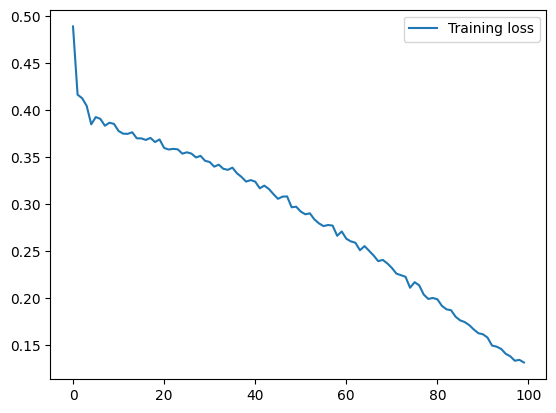

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

In [ ]:
trainpredict= model.predict(trainX)
testpredict= model.predict(testX)

16/16 [==============================] - 0s 2ms/step


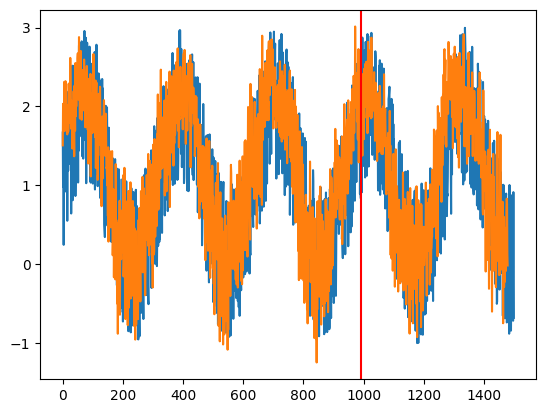

In [ ]:
predicted= np.concatenate((trainpredict, testpredict), axis=0)

plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c='r')
plt.show()